In [ ]:
# Data Manipulation / Linear Algebra
import pandas as pd
import numpy as np

# NLP / Text Manipulation
import regex
import nltk
nltk.download("stopwords")
nltk.download("punkt")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv("IMDB Dataset.csv")
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
# Sentiment Value Count
data['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


In [ ]:
# Checking for null values
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
# Shape of Data
data.shape

(50000, 2)

In [ ]:
import re

def cleanText(text):
    # Remove HTML tags
      text = re.sub(r"<[^<]+?>", "", text)

            # Remove special characters
      text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

                    # Convert to lowercase
      text = text.lower()

      return text
 # Applying the function to data
data["review"] = data["review"].apply(cleanText)
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_da

True

In [ ]:
# Get list of stopwords from nltk
stopword_list = stopwords.words('english')

# Tokenize and Remove StopWords
def remove_stopwords(text):
      # Tokenize the text
          tokens = word_tokenize(text)

      # Filter out the stopwords
          filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

       # Join the filtered tokens back into a single string
          filtered_text = ' '.join(filtered_tokens)

          return filtered_text






# Applying the function to remove stopwords
data['review'] = data['review'].apply(remove_stopwords)
data.head(10)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea 70s first a...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


In [ ]:
# PorterStemmer to Convert the words to base form
def simple_stemmer(text):
    ps = PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

# Applying the function to stemm words
data['review'] = data['review'].apply(simple_stemmer)
data.head(10)

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,show amaz fresh innov idea 70 first air first ...,negative
8,encourag posit comment film look forward watch...,negative
9,like origin gut wrench laughter like movi youn...,positive


In [ ]:
# Applying the function to remove stopwords
data['review'] = data['review'].apply(remove_stopwords)
data.head(10)

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,show amaz fresh innov idea 70 first air first ...,negative
8,encourag posit comment film look forward watch...,negative
9,like origin gut wrench laughter like movi youn...,positive


In [ ]:
# Seperating Features and Target Variable
X = data['review']
y = data['sentiment']

In [ ]:
# Initializing the CountVectorizer
vect = CountVectorizer(ngram_range=(1, 3))

# Vectorizing the text
X = vect.fit_transform(X).astype(np.int8)
X

<50000x8330584 sparse matrix of type '<class 'numpy.int8'>'
	with 16340447 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Example dataset, replace with your actual dataset
X  #  feature data
y  #  label data

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def classifier_testing(clf, X_train, X_test, y_train, y_test):
      # Training the Classifier
          clf.fit(X_train, y_train)

       # Getting Predictions
          y_pred = clf.predict(X_test)

       # Accuracy Score
          clf_accuracy_score = accuracy_score(y_test, y_pred)
          print("Accuracy Score:\n", clf_accuracy_score, "\n")

       # Classification Report
          class_rep = classification_report(y_test, y_pred)
          print("Classification Report:\n", class_rep, "\n")

       # Confusion Matrix
          conf_mtx = confusion_matrix(y_test, y_pred)
          print("Confusion Matrix:\n", conf_mtx, "\n")

In [ ]:
# Initializing NaiveBayes-BernoulliNB Classifier
BNB = BernoulliNB(fit_prior=False, alpha=0.2)


# Training / Testing
classifier_testing(BNB, X_train, X_test, y_train, y_test)

Accuracy Score:
 0.8726 

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.92      0.88      4961
    positive       0.92      0.82      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000
 

Confusion Matrix:
 [[4584  377]
 [ 897 4142]] 



In [ ]:
# Initializing NaiveBayes-MultinomialNB Classifier
MNB = MultinomialNB(fit_prior=False, alpha=1.3)

# Training / Testing
classifier_testing(MNB, X_train, X_test, y_train, y_test)

Accuracy Score:
 0.8853 

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.90      0.89      4961
    positive       0.90      0.87      0.88      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000
 

Confusion Matrix:
 [[4465  496]
 [ 651 4388]] 



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


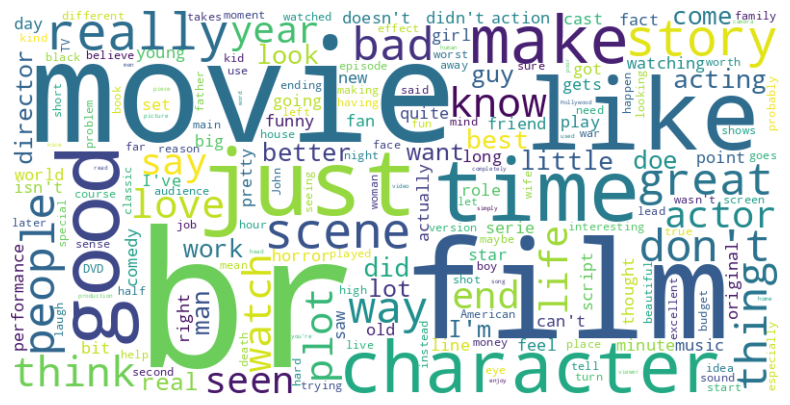

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load your IMDb dataset (replace 'imdb_data.csv' with your file path)
df = pd.read_csv('IMDB Dataset.csv')

# Check the first few rows to understand the structure of the dataset
print(df.head())

# Assuming the dataset has a 'review' column containing text data
# You may need to adjust the column name if it's different
text_data = " ".join(review for review in df['review'].dropna())

# Optionally, remove stopwords using the predefined stopwords list
stopwords = set(ENGLISH_STOP_WORDS)

# Create the WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=False).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis for a cleaner look
plt.show()


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


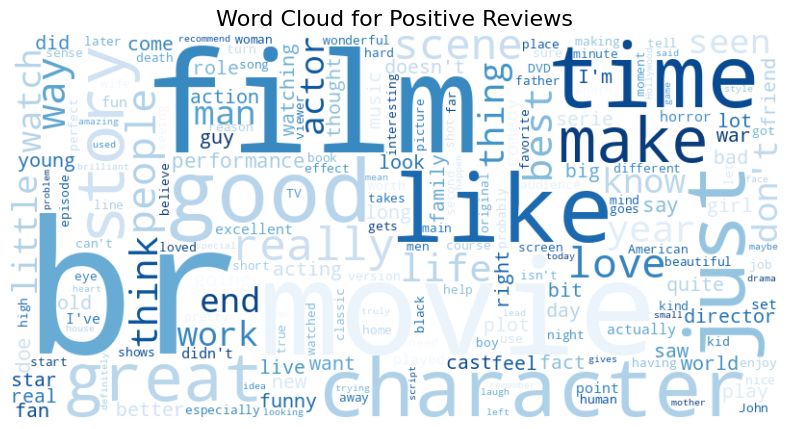

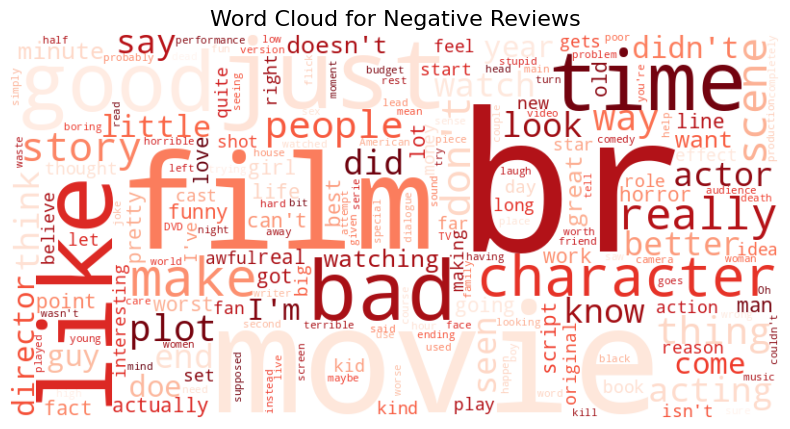

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load your IMDb dataset (replace 'imdb_data.csv' with your actual file path)
df = pd.read_csv('IMDB Dataset.csv')

# Check the first few rows to understand the structure
print(df.head())

# Assuming 'review' is the column with text data and 'sentiment' is the label (1 for positive, 0 for negative)
# If your dataset uses different column names, adjust accordingly

# Separate positive and negative reviews
positive_reviews = " ".join(review for review in df[df['sentiment'] == "positive"]['review'].dropna())
negative_reviews = " ".join(review for review in df[df['sentiment'] == "negative"]['review'].dropna())

# Optionally, remove stopwords using the predefined stopwords list
stopwords = set(ENGLISH_STOP_WORDS)

# Create the WordCloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400,
                               background_color='white',
                               stopwords=stopwords,
                               colormap='Blues',  # Blue color for positive
                               collocations=False).generate(positive_reviews)

 # Create the WordCloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400,
                               background_color='white',
                               stopwords=stopwords,
                               colormap='Reds',  # Red color for negative
                               collocations=False).generate(negative_reviews)

 # Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis for a cleaner look
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.show()

# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis for a cleaner look
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.show()
